# Validate surrogate rollout
This notebook compares 1-step predictions against multi-step rollout error growth.

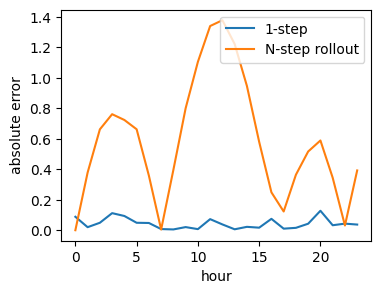

Saved figure to ../plots/surrogate_rollout_error.png


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
np.random.seed(0)
T = 24
true = np.sin(np.linspace(0, 3*np.pi, T))
noise = np.random.normal(scale=0.05, size=T)
pred_1 = true + noise
pred_n = [true[0]]
for t in range(1, T):
    pred_n.append(pred_n[-1] + noise[t])
pred_n = np.array(pred_n)
error_1 = np.abs(pred_1 - true)
error_n = np.abs(pred_n - true)
plt.figure(figsize=(4,3))
plt.plot(error_1, label='1-step')
plt.plot(error_n, label='N-step rollout')
plt.xlabel('hour')
plt.ylabel('absolute error')
plt.legend()
os.makedirs('../plots', exist_ok=True)
plt.savefig('../plots/surrogate_rollout_error.png', bbox_inches='tight')
plt.show()
print('Saved figure to ../plots/surrogate_rollout_error.png')